In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
cd Feta_dataset/

/content/drive/My Drive/Feta_dataset


In [ ]:
ls

cornaldataset.zip  Fetadataset.zip  satigaldataset.zip


In [ ]:
!unzip Fetadataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fetadataset/validationdata/images/sub-045_207.png  
  inflating: Fetadataset/validationdata/images/sub-045_208.png  
  inflating: Fetadataset/validationdata/images/sub-045_209.png  
  inflating: Fetadataset/validationdata/images/sub-045_21.png  
  inflating: Fetadataset/validationdata/images/sub-045_210.png  
  inflating: Fetadataset/validationdata/images/sub-045_211.png  
  inflating: Fetadataset/validationdata/images/sub-045_212.png  
  inflating: Fetadataset/validationdata/images/sub-045_213.png  
  inflating: Fetadataset/validationdata/images/sub-045_214.png  
  inflating: Fetadataset/validationdata/images/sub-045_215.png  
  inflating: Fetadataset/validationdata/images/sub-045_216.png  
  inflating: Fetadataset/validationdata/images/sub-045_217.png  
  inflating: Fetadataset/validationdata/images/sub-045_218.png  
  inflating: Fetadataset/validationdata/images/sub-045_219.png  
  inflating: Fetadataset/validationdata/

In [ ]:
ls

cornaldataset.zip  Fetadataset/  Fetadataset.zip  satigaldataset.zip


In [ ]:
! pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 5.3 MB/s 
     |████████████████████████████████| 948 kB 39.1 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65172 sha256=8449ed23c1974296206f099c5154e27591c4eb4b2ed5104df48e72d08e2d28d8
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import torch 
import cv2
import os
from torch.utils.data import Dataset
import albumentations as A
import albumentations.augmentations.functional as F
import matplotlib.pyplot as plt
import numpy as np
#from albumentations.pytorch import ToTensorV2
#from albumentations.pytorch.transforms import ToTensorV2
# Data Transform Funtion 

train_transform = A.Compose(
    [
        A.Resize(256, 256),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#        ToTensorV2(),
    ]
)

train_transform1 = A.Compose(
    [
        A.Resize(256, 256),
        A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
        #A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        #ToTensorV2(),
    ]
)
from torchvision import transforms

trans = transforms.Compose([transforms.ToTensor()])

from PIL import Image 
# Dataset Class

class Moona_First_Dataset(Dataset):
  def __init__(self,image,mask,transform=None):
    self.image=image
    self.mask=mask
    self.transform=transform
    self.num_classes=8

    # List directory for images
    list_image=os.listdir(self.image)
    self.path_image=[]
    for i in list_image:
      pathimg=os.path.join(self.image,i)
      self.path_image.append(pathimg)

    # List directory for mask
    list_masks=os.listdir(self.mask) 
    self.path_mask=[]
    for i in list_masks:
      pathmsk=os.path.join(self.mask,i) 
      self.path_mask.append(pathmsk)

  
  def __getitem__(self,idx):
    imagePath=self.path_image[idx]
    maskPath=self.path_mask[idx]

    # to read and resize an image
    #image=cv2.imread(imagePath)
    image=Image.open(imagePath)
    image=(np.asarray(image) / 65536).astype('float32')
    #image=cv2.resize(image,(224,224))
    mask=cv2.imread(maskPath,0)
    #mask=cv2.resize(mask,(224,224))
    # convert into onehot encoding
    #mask_oh = torch.nn.functional.one_hot(torch.from_numpy(mask).long(), self.num_classes).permute(2,0,1).float()

    if self.transform is not None:
      image=self.transform(image)
      #image=transformed(image)
      #mask=self.transform(mask)
    
    # convert into onehot encoding
    mask_oh = torch.nn.functional.one_hot(torch.from_numpy(mask).long(), self.num_classes).permute(2,0,1).float()

    return image,mask_oh

  def __len__(self):
    return len(self.path_image)


In [ ]:
# Giving Folder paths

image_folder_train="/content/drive/MyDrive/Feta_dataset/Fetadataset/trainingdata/images"
mask_folder_train="/content/drive/MyDrive/Feta_dataset/Fetadataset/trainingdata/masks"

image_folder_valid="/content/drive/MyDrive/Feta_dataset/Fetadataset/validationdata/images"
mask_folder_valid="/content/drive/MyDrive/Feta_dataset/Fetadataset/validationdata/masks"

# Creating Class instance

dataset_train=Moona_First_Dataset(image_folder_train,mask_folder_train,transform=trans)
dataset_valid=Moona_First_Dataset(image_folder_valid,mask_folder_valid,transform=trans)

# Checking the length of the dataset
len(dataset_train)
image,mask=dataset_train[0]
print(image.shape)
print(mask.shape)


torch.Size([1, 256, 256])
torch.Size([8, 256, 256])


In [ ]:
from torch.utils.data import DataLoader

dataset=dataset_train
len(dataset) 
imges,masks=dataset[110]
print(imges.shape)
print(masks.shape)
print(imges.dtype)
print(masks.dtype)
print(imges.max())
print(masks.max())
print(imges.min())
print(masks.min())
imgesf=imges[:,:,2]
mask1=masks[1,:,:].numpy()
mask2=masks[2,:,:].numpy()
mask3=masks[3,:,:].numpy()
mask4=masks[0,:,:].numpy()

torch.Size([1, 256, 256])
torch.Size([8, 256, 256])
torch.float32
torch.float32
tensor(0.)
tensor(1.)
tensor(0.)
tensor(0.)


In [ ]:
dataset=dataset_valid
len(dataset) 
imges,masks=dataset[110]
print(imges.shape)
print(masks.shape)
print(imges.dtype)
print(masks.dtype)
print(imges.max())
print(masks.max())
print(imges.min())
print(masks.min())

torch.Size([1, 256, 256])
torch.Size([8, 256, 256])
torch.float32
torch.float32
tensor(1.0000)
tensor(1.)
tensor(0.)
tensor(0.)


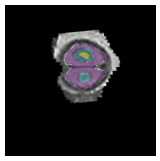

In [ ]:
import random
ix = random.randint(0, len(dataset))
img, mask= dataset[ix]
fig, ax = plt.subplots(dpi=50)
ax.imshow(img[0], cmap="gray")
ax.axis('off')
mask = torch.argmax(mask, axis=0).float().numpy()
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
plt.show()

In [ ]:
data={'train':dataset_train,
      'val':dataset_valid}
## check dataset image shape and mask
imgs, masks = next(iter(data['train']))
imgs.shape, masks.shape

(torch.Size([1, 256, 256]), torch.Size([8, 256, 256]))

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


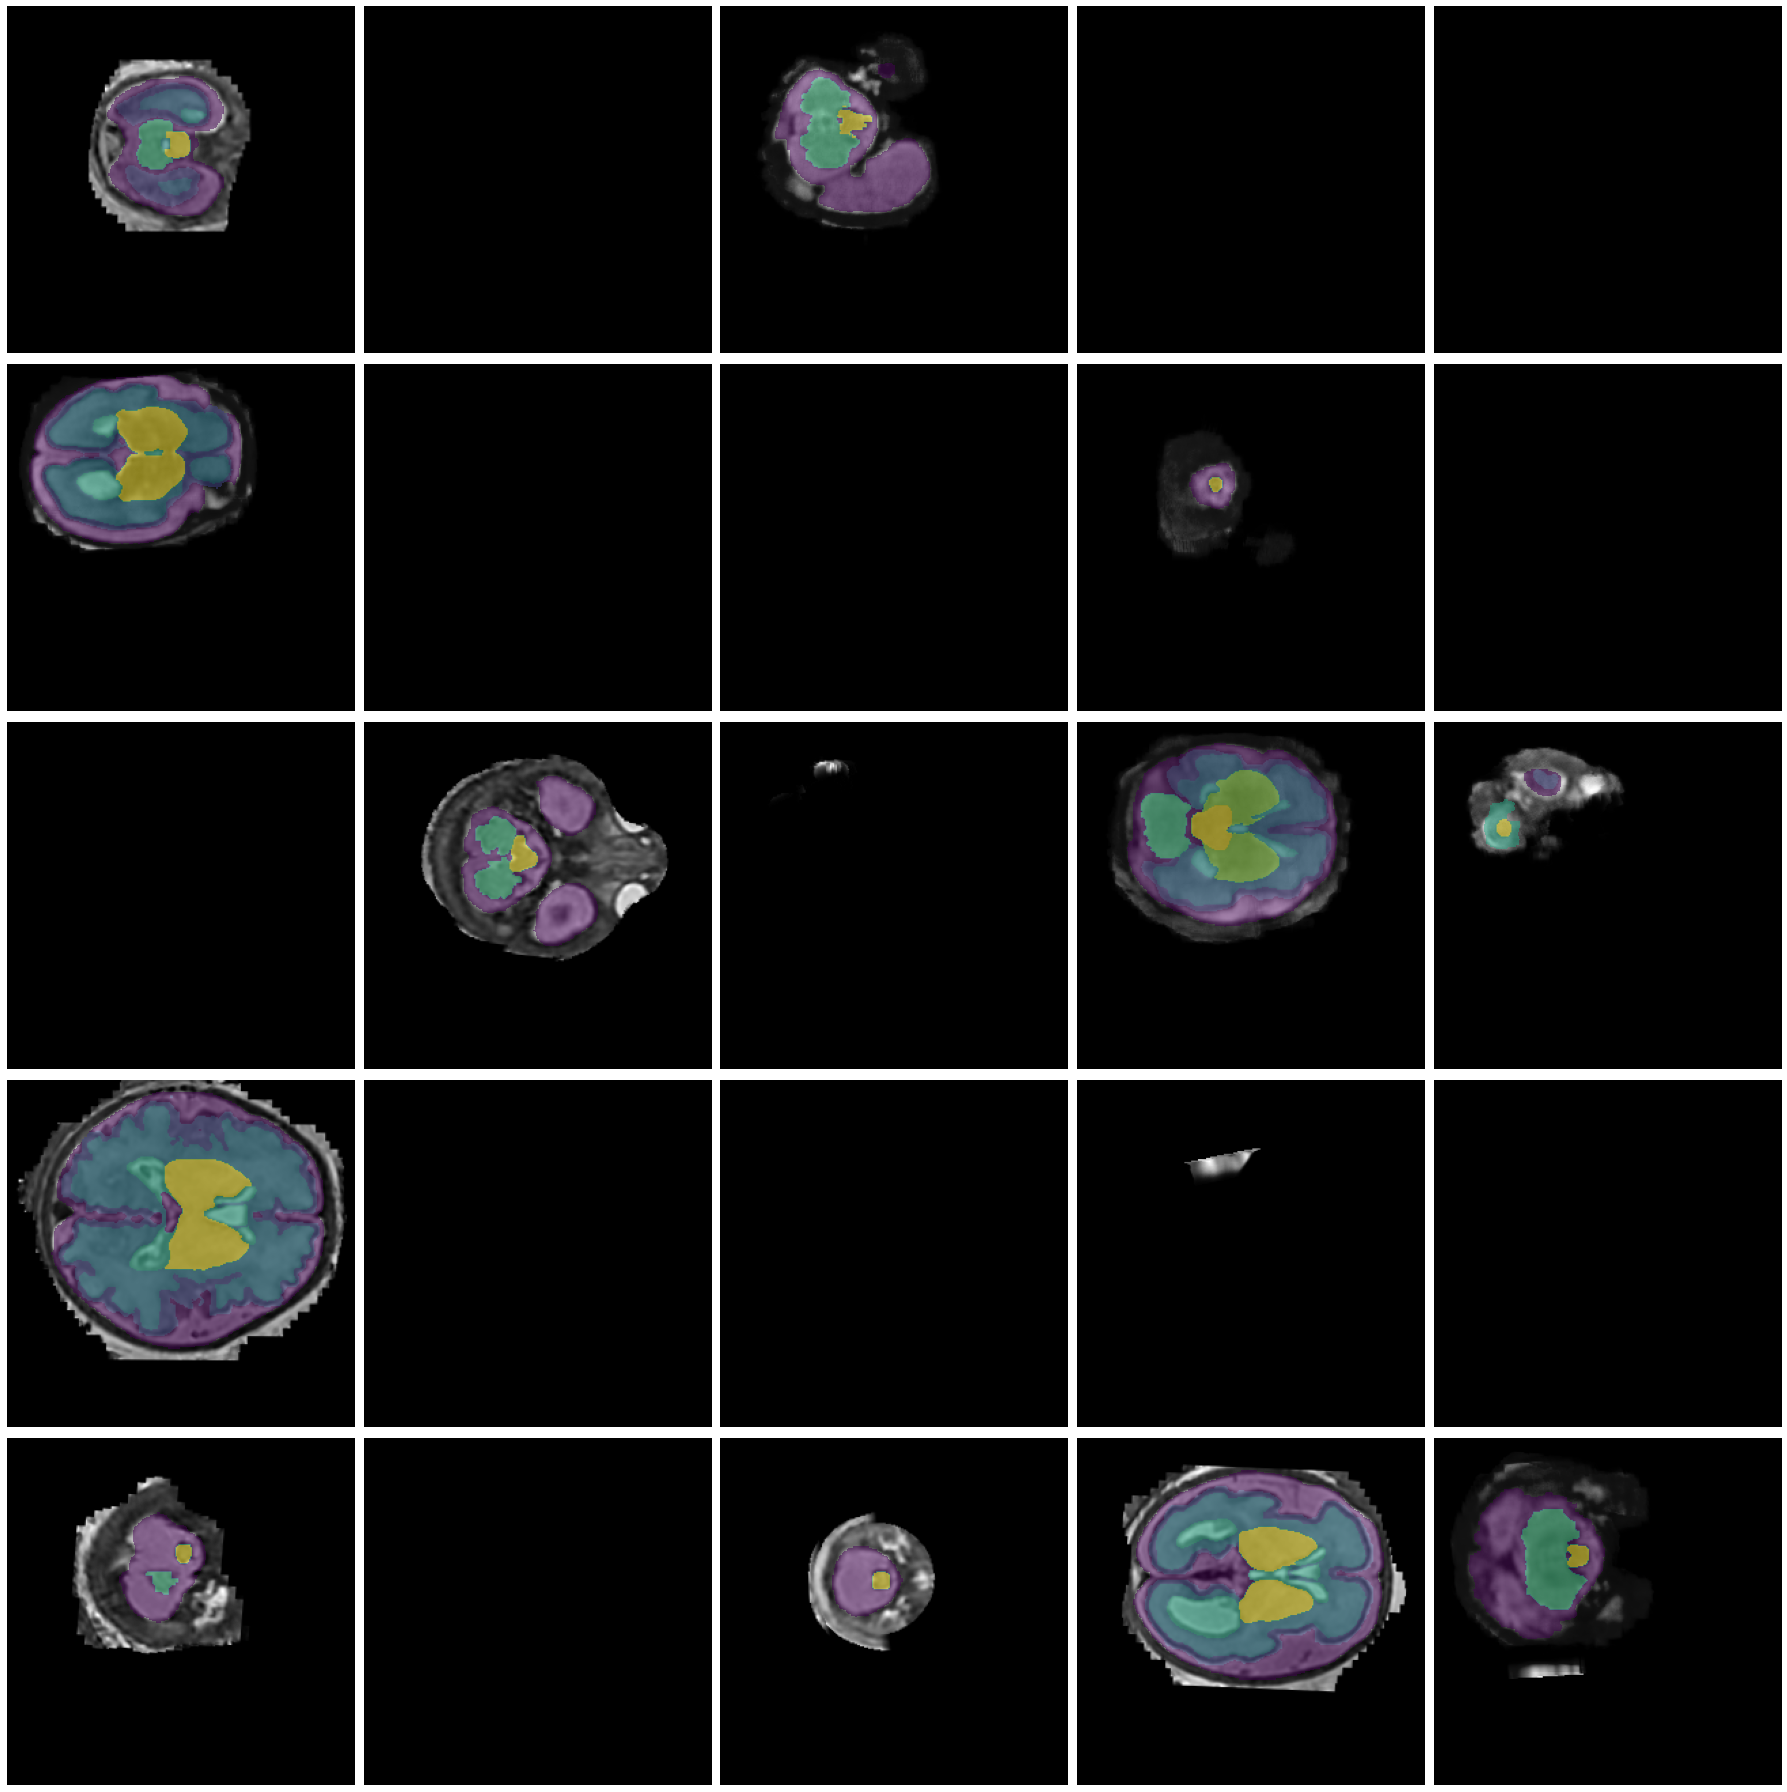

In [ ]:
#################### take the batch size and prepare dataloader ######
batch_size=25
dataloader = {
    'train': torch.utils.data.DataLoader(data['train'], batch_size=batch_size, shuffle=True, pin_memory=True),
    'val': torch.utils.data.DataLoader(data['val'], batch_size=batch_size, shuffle=False, pin_memory=True),
}
imgs, masks = next(iter(dataloader['train']))
imgs.shape, masks.shape

import matplotlib.pyplot as plt

r, c = 5, 5
fig = plt.figure(figsize=(5*r, 5*c))
for i in range(r):
    for j in range(c):
        ix = c*i + j
        ax = plt.subplot(r, c, ix + 1)
        ax.imshow(imgs[ix].squeeze(0), cmap="gray")
        mask = torch.argmax(masks[ix], axis=0).float().numpy()
        mask[mask == 0] = np.nan
        ax.imshow(mask, alpha=0.5)
        ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
################### Dataloader with more transforms functions ###############
import torch 
import cv2
import os
from torch.utils.data import Dataset
import albumentations as A
import albumentations.augmentations.functional as F
import matplotlib.pyplot as plt
import numpy as np
#from albumentations.pytorch import ToTensorV2
#from albumentations.pytorch.transforms import ToTensorV2
# Data Transform Funtion 
from PIL import Image 
# Dataset Class

class Moona_First_Dataset(Dataset):
  def __init__(self,image,mask,trans=None):
    self.image=image
    self.mask=mask
    self.trans=trans
    self.num_classes=8

    # List directory for images
    list_image=os.listdir(self.image)
    self.path_image=[]
    for i in list_image:
      pathimg=os.path.join(self.image,i)
      self.path_image.append(pathimg)

    # List directory for mask
    list_masks=os.listdir(self.mask) 
    self.path_mask=[]
    for i in list_masks:
      pathmsk=os.path.join(self.mask,i) 
      self.path_mask.append(pathmsk)

  
  def __getitem__(self,idx):
    imagePath=self.path_image[idx]
    maskPath=self.path_mask[idx]

    # to read and resize an image
    #image=cv2.imread(imagePath)
    image=Image.open(imagePath)
    image=(np.asarray(image) / 65536).astype('float32')
    #image=cv2.resize(image,(224,224))
    mask=cv2.imread(maskPath,0)
    #mask=cv2.resize(mask,(224,224))
    # convert into onehot encoding
    #mask_oh = torch.nn.functional.one_hot(torch.from_numpy(mask).long(), self.num_classes).permute(2,0,1).float()

    if self.trans:
      t = self.trans(image=image, mask=mask)
      image = t['image']
      mask = t['mask'] 
    #img_t=torch.from_numpy(image).float().permute(2,0,1)
    img_t=image
    mask_t=mask
    
    # convert into onehot encoding
    mask_t = torch.nn.functional.one_hot(torch.from_numpy(mask_t).long(), self.num_classes).permute(2,0,1).float()

    return image,mask_t

  def __len__(self):
    return len(self.path_image)

In [ ]:
from albumentations.pytorch import ToTensorV2
import albumentations as A
############ validation transform ######################
trans = A.Compose([
    A.Resize(256, 256),
])
#################### training transform ############################
transform_train= A.Compose({
        A.Resize(256, 256),
        A.CenterCrop(256, 256),
        A.HorizontalFlip(p=0.5),
        #A.Rotate(limit=(-90, 90)),
        A.VerticalFlip(p=0.5),
        #A.RandomRotate90(p=0.5),
        # A.OneOf([
        # A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
        # A.GridDistortion(p=0.5),
        #A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)], p=0.8),
        #A.CLAHE(p=0.8),
        A.RandomBrightnessContrast(p=0.8),
        A.RandomGamma(p=0.8),
        #A.GridDistortion(p=0.5),
        })

In [ ]:
image_folder_train="/content/drive/MyDrive/Feta_dataset/Fetadataset/trainingdata/images"
mask_folder_train="/content/drive/MyDrive/Feta_dataset/Fetadataset/trainingdata/masks"

image_folder_valid="/content/drive/MyDrive/Feta_dataset/Fetadataset/validationdata/images"
mask_folder_valid="/content/drive/MyDrive/Feta_dataset/Fetadataset/validationdata/masks"

# Creating Class instance

dataset_train1=Moona_First_Dataset(image_folder_train,mask_folder_train,trans=transform_train)
dataset_valid1=Moona_First_Dataset(image_folder_valid,mask_folder_valid,trans=trans)

# Checking the length of the dataset
len(dataset_train1)
image,mask=dataset_train1[0]
print(image.shape)
print(mask.shape)

(256, 256)
torch.Size([8, 256, 256])


In [ ]:
dataset=dataset_train1
len(dataset) 
imges,masks=dataset[110]
print(imges.shape)
print(masks.shape)
print(imges.dtype)
print(masks.dtype)
print(imges.max())
print(masks.max())
print(imges.min())
print(masks.min())
#imgesf=imges[:,:,2]
mask1=masks[1,:,:].numpy()
mask2=masks[2,:,:].numpy()
mask3=masks[3,:,:].numpy()
mask4=masks[0,:,:].numpy()

(256, 256)
torch.Size([8, 256, 256])
float32
torch.float32
0.17688039
tensor(1.)
0.17688039
tensor(0.)


In [ ]:
dataset=dataset_valid1
len(dataset) 
imges,masks=dataset[0]
print(imges.shape)
print(masks.shape)
print(imges.dtype)
print(masks.dtype)
print(imges.max())
print(masks.max())
print(imges.min())
print(masks.min())

(256, 256)
torch.Size([8, 256, 256])
float32
torch.float32
0.0
tensor(1.)
0.0
tensor(0.)


In [ ]:
data={'train':dataset_train1,
      'val':dataset_valid1}
## check dataset image shape and mask
imgs, masks = next(iter(data['train']))
imgs.shape, masks.shape

((256, 256), torch.Size([8, 256, 256]))

/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


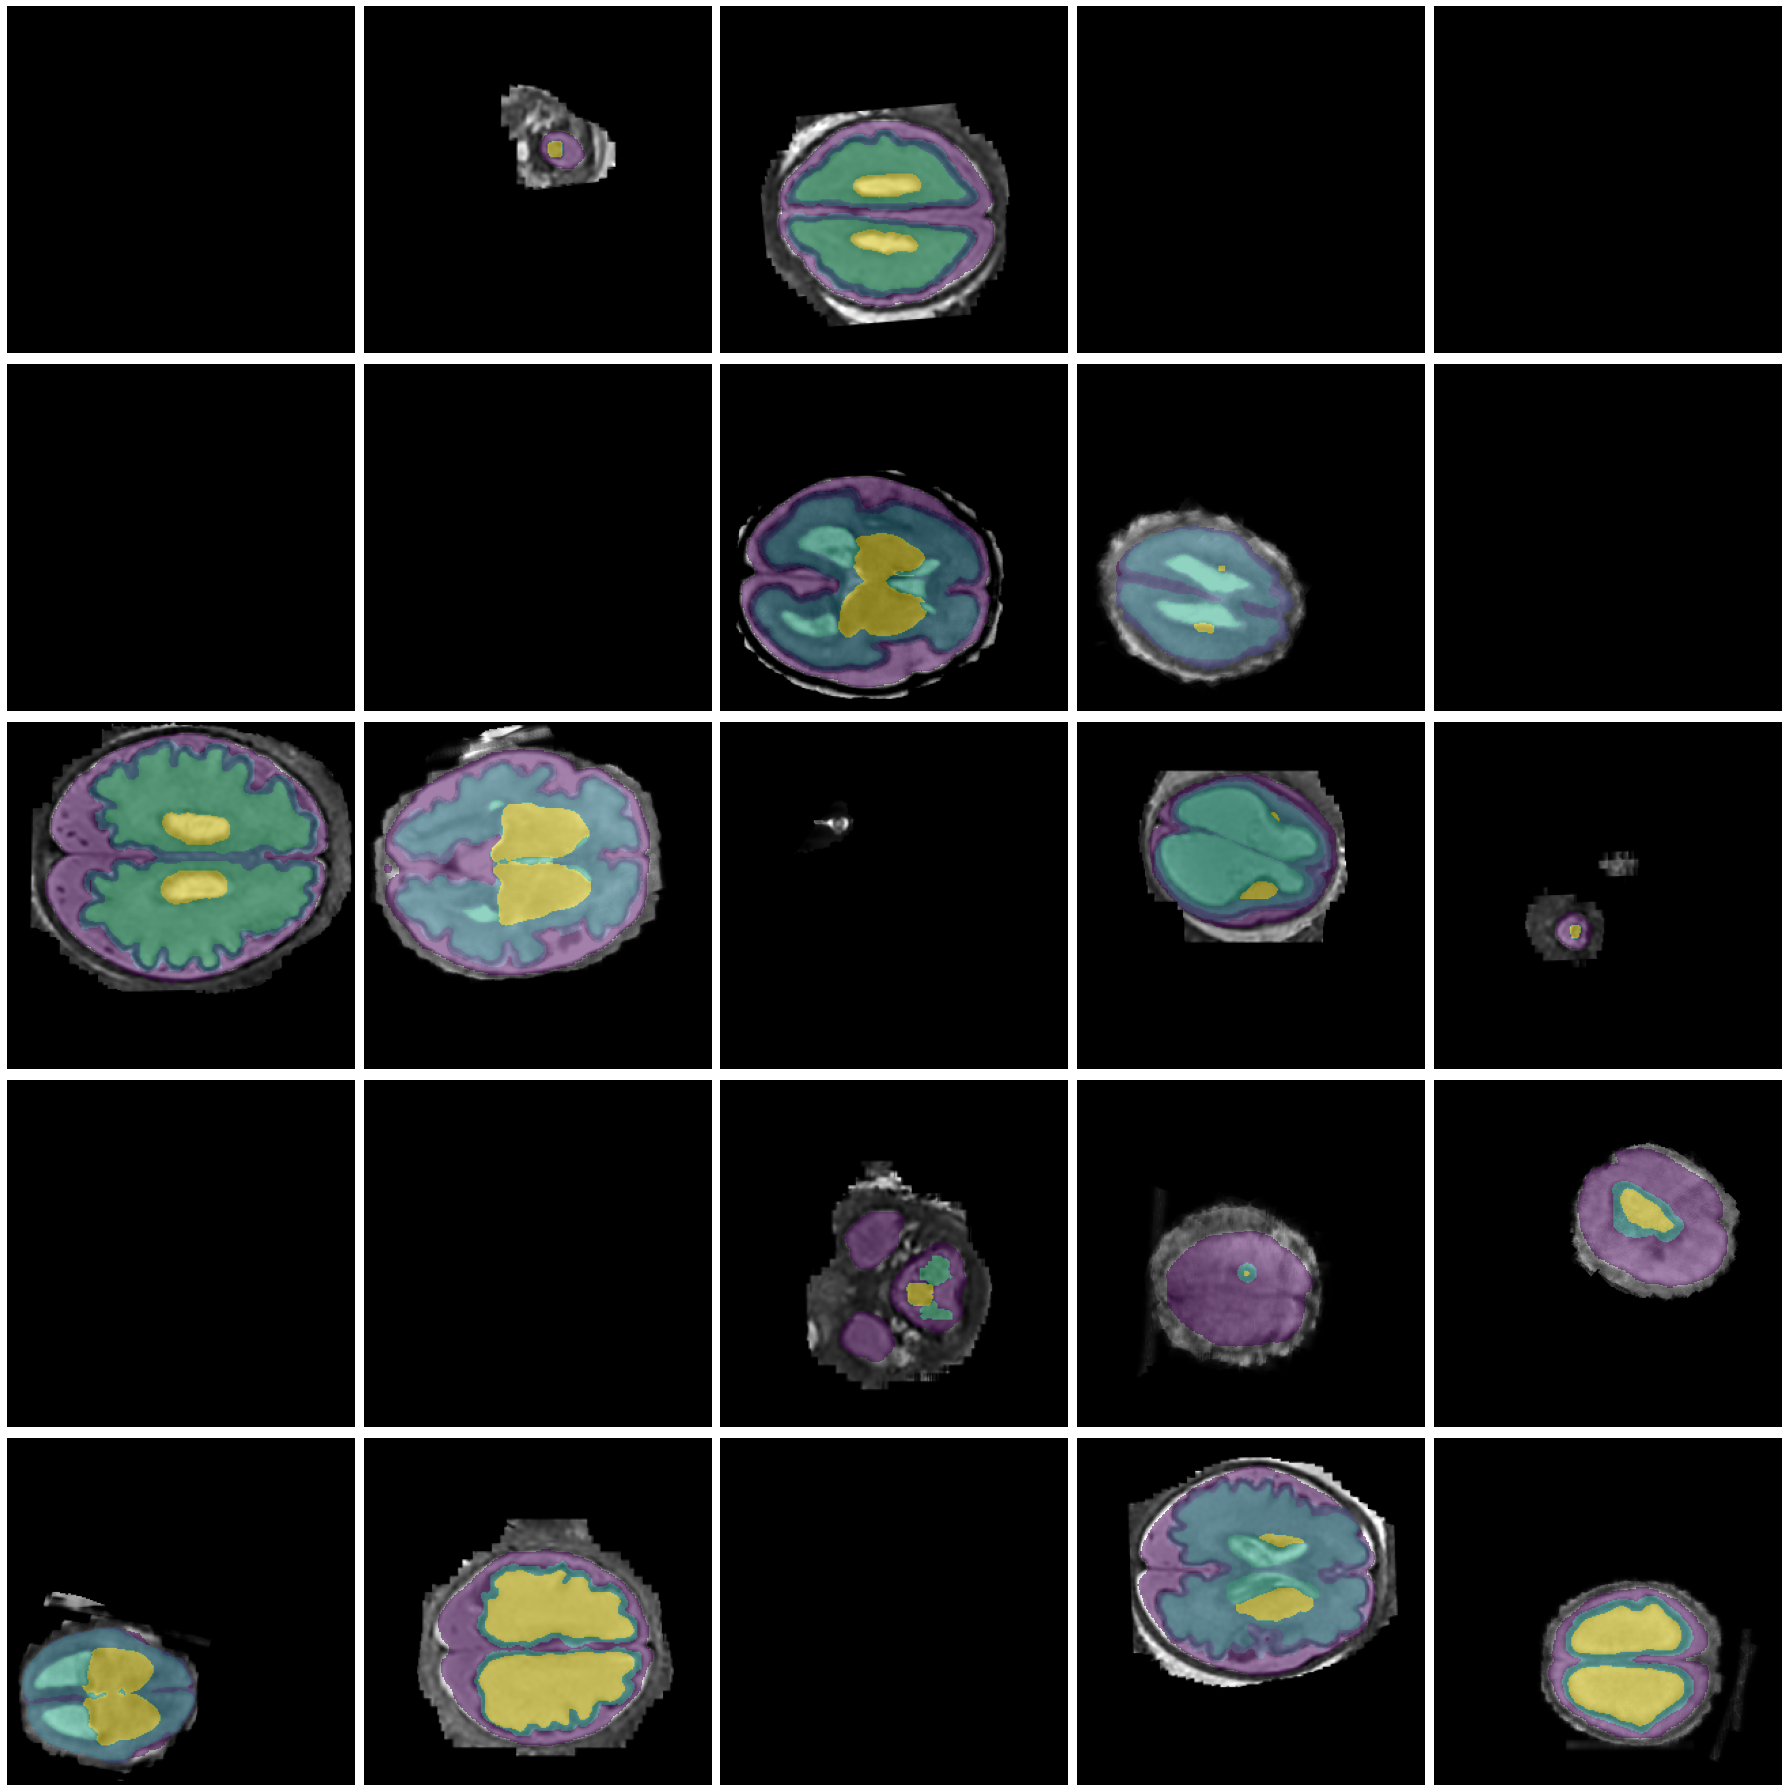

In [ ]:
batch_size=25
dataloader = {
    'train': torch.utils.data.DataLoader(data['train'], batch_size=batch_size, shuffle=True, pin_memory=True),
    'val': torch.utils.data.DataLoader(data['val'], batch_size=batch_size, shuffle=False, pin_memory=True),
}
imgs, masks = next(iter(dataloader['train']))
imgs.shape, masks.shape

import matplotlib.pyplot as plt

r, c = 5, 5
fig = plt.figure(figsize=(5*r, 5*c))
for i in range(r):
    for j in range(c):
        ix = c*i + j
        ax = plt.subplot(r, c, ix + 1)
        ax.imshow(imgs[ix].squeeze(0), cmap="gray")
        mask = torch.argmax(masks[ix], axis=0).float().numpy()
        mask[mask == 0] = np.nan
        ax.imshow(mask, alpha=0.5)
        ax.axis('off')
plt.tight_layout()
plt.show()